In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
import keras
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from matplotlib import pyplot
import cv2


In [3]:
!mkdir MyDrive

mkdir: cannot create directory ‘MyDrive’: File exists


In [4]:
!mount --bind /content/drive/My\ Drive /content/MyDrive

In [5]:
os.chdir("/content/MyDrive/AI_VAR/LAB3/Application2")

In [6]:
def prepareData(trainX, trainY, testX, testY):

  #TODO - Application 1 - Step 3 - reshape the data to be of size [samples][width][height][channels]
  trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32') 
  testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32') 

    #TODO - Application 1 - Step 4 - normalize the input values
  trainX = trainX / 255 
  testX = testX / 255 

    #TODO - Application 1 - Step 5 - Transform the classes labels into a binary matrix
  trainY = np_utils.to_categorical(trainY) 
  testY = np_utils.to_categorical(testY) 
  num_classes = testY.shape[1]  

  return trainX, trainY, testX, testY

In [7]:
def defineModel(input_shape, num_classes):

    # Application 1 - Step 6 - Initialize the sequential model
    model = Sequential()

    #TODO - Application 1 - Step 6 - Create the first hidden layer as a convolutional layer
    model.add(keras.Input(shape=input_shape))  # 28x28x1 images
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", kernel_initializer='he_uniform'))  # padding="same"

    #TODO - Application 1 - Step 6 - Define the pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Exercise 6 - Add a dropout layer
    model.add(Dropout(0.40)) #20% dropout

    #TODO - Application 1 - Step 6 - Define the flatten layer
    model.add(Flatten())

    #TODO - Application 1 - Step 6 - Define a dense layer of size 16
    model.add(Dense(units = 250, activation = "relu", kernel_initializer='he_uniform'))

    #TODO - Application 1 - Step 6 - Define the output layer
    model.add(Dense(10, activation='softmax'))

    #TODO - Application 1 - Step 6 - Compile the model
    sgd = SGD(lr=0.001,  momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


    return model

In [8]:
def trainAndEvaluateKFolds(trainX, trainY, testX, testY):

    k_folds = 5

    scores = []
    histories = []

    #Application 2 - Prepare the cross validation datasets
    kfold = KFold(k_folds, shuffle=True, random_state=1)


    #Enumerate splits
    for train_idx, val_idx in kfold.split(trainX):

        #TODO - Application 2 - Step 1 - Select data for train and validation
        trainX_i = trainX[train_idx] 
        trainY_i = trainY[train_idx] 
        valX_i = trainX[val_idx] 
        valY_i = trainY[val_idx]
        #TODO - Application 2 - Step 1 - Create the model
        model = defineModel((28, 28, 1), 10)

        #TODO - Application 2 - Step 1 - Fit the model
        history = model.fit(trainX_i, trainY_i, epochs=5, batch_size=32, validation_data= (valX_i, valY_i), verbose=1)

        #TODO - Application 2 - Step 1 - Evaluate the model on the test dataset
        _, acc = model.evaluate(testX, testY, verbose=0)

        #TODO - Application 2 - Step 1 - Save the accuracy scores in the scores list
        #and the learning history in the histories list
        histories.append(history)
        scores.append(acc)
        
    return scores, histories

In [9]:
def summarizeLearningCurvesPerformances(histories, scores):

    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='green', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='red', label='test')

        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='green', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='red', label='test')

        #print accuracy for each split
        print("Accuracy for set {} = {}".format(i, scores[i]))

    pyplot.show()

    print('Accuracy: mean = {:.3f} std = {:.3f}, n = {}'.format(mean(scores) * 100, std(scores) * 100, len(scores)))

In [10]:
def main():

    #TODO - Application 1 - Step 2 - Load the Fashion MNIST dataset in Keras
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data() 

    #TODO - Application 1 - Step 2 - Print the size of the train/test dataset
    print('Train: X={}, Y={}'.format(trainX.shape, trainY.shape)) 
    print('Test: X={}, Y={}'.format(testX.shape, testY.shape)) 

    #TODO - Application 1 - Call the prepareData method
    trainX, trainY, testX, testY = prepareData(trainX, trainY, testX, testY)

    #TODO - Application 1 - Step 7 - Train and evaluate the model in the classic way
    
    #trainAndEvaluateClassic(trainX, trainY, testX, testY) 

    #TODO - Application 2 Train and evaluate the model using K-Folds strategy
    scores, histories = trainAndEvaluateKFolds(trainX, trainY, testX, testY)

    #Application 2 - Step2 - System performance presentation
    summarizeLearningCurvesPerformances(histories, scores)

    return

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6272 - accuracy: 0.7792 - val_loss: 0.4603 - val_accuracy: 0.8332
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4467 - accuracy: 0.8431 - val_loss: 0.3804 - val_accuracy: 0.8683
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8601 - val_loss: 0.3506 - val_accuracy: 0.8742
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.8705 - val_loss: 0.3371 - val_accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3472 - accuracy: 0.8773 - val_loss: 0.3179 - val_accuracy: 0.8855
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6195 - accuracy: 0.7793 - val_loss: 0.4219 - val_accuracy: 0.8500
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


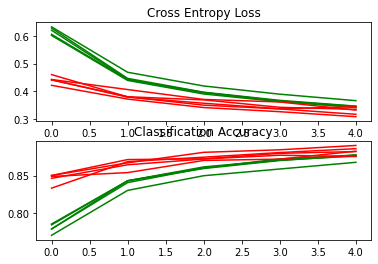

Accuracy: mean = 87.384 std = 0.403, n = 5


In [11]:
if __name__ == '__main__':
    main()